In [1]:
pip install xgboost==1.6.2 scikit-learn==1.2.2

  Using cached xgboost-1.6.2-py3-none-macosx_12_0_arm64.whl.metadata (1.8 kB)
  Using cached scikit-learn-1.2.2.tar.gz (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [11529 lines of output]
      Partial import of sklearn during the build process.
      clang: error: unsupported option '-fopenmp'
      /private/var/folders/tg/w9lr8s316z3bvyyx8v9hx33w0000gn/T/pip-install-m4vp194n/scikit-learn_f2f4ecbbc51d485784def09f89e532fd/sklearn/_build_utils/openmp_helpers.py:130: UserWarning:
      
                      ***********
                      * WARNING *
                      ***********
      
      It seems that scikit-learn cannot be built with OpenMP.
      
      - Make sure you have followed the installation instructions:
      
          https://scikit-lea

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np
import warnings
from sklearn import set_config
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
plans = [
    {'plan_id': 1, 'name': 'Basic', 'data': 2, 'speed': '3G', 'price': 10, 'international': False, 'high_speed': False},
    {'plan_id': 2, 'name': 'Standard', 'data': 5, 'speed': '4G', 'price': 30, 'international': False, 'high_speed': True},
    {'plan_id': 3, 'name': 'Pro', 'data': 10, 'speed': '4G', 'price': 50, 'international': True, 'high_speed': True},
    {'plan_id': 4, 'name': 'Ultra', 'data': 'Unlimited', 'speed': '5G', 'price': 70, 'international': True, 'high_speed': True}
]

In [4]:
data = pd.read_csv('/Users/vasista/Downloads/synthetic_customer_data.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  50000 non-null  int64
 1   income               50000 non-null  int64
 2   data_usage           50000 non-null  int64
 3   budget               50000 non-null  int64
 4   international_calls  50000 non-null  int64
 5   high_speed_internet  50000 non-null  int64
 6   plan_id              50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB
None


In [6]:
print(data.describe())

                age        income    data_usage        budget  \
count  50000.000000   50000.00000  50000.000000  50000.000000   
mean      46.516760    4912.72808     10.009780     84.184080   
std       16.709248    6408.19573      3.165888     37.535615   
min       18.000000      34.00000      0.000000     20.000000   
25%       32.000000    1523.75000      8.000000     52.000000   
50%       46.000000    2956.00000     10.000000     84.000000   
75%       61.000000    5826.00000     12.000000    117.000000   
max       75.000000  179773.00000     26.000000    149.000000   

       international_calls  high_speed_internet       plan_id  
count         50000.000000         50000.000000  50000.000000  
mean              0.299820             0.802380      3.381400  
std               0.458184             0.398208      0.873767  
min               0.000000             0.000000      1.000000  
25%               0.000000             1.000000      3.000000  
50%               0.000000    

In [7]:
print(data.isnull().sum())

age                    0
income                 0
data_usage             0
budget                 0
international_calls    0
high_speed_internet    0
plan_id                0
dtype: int64


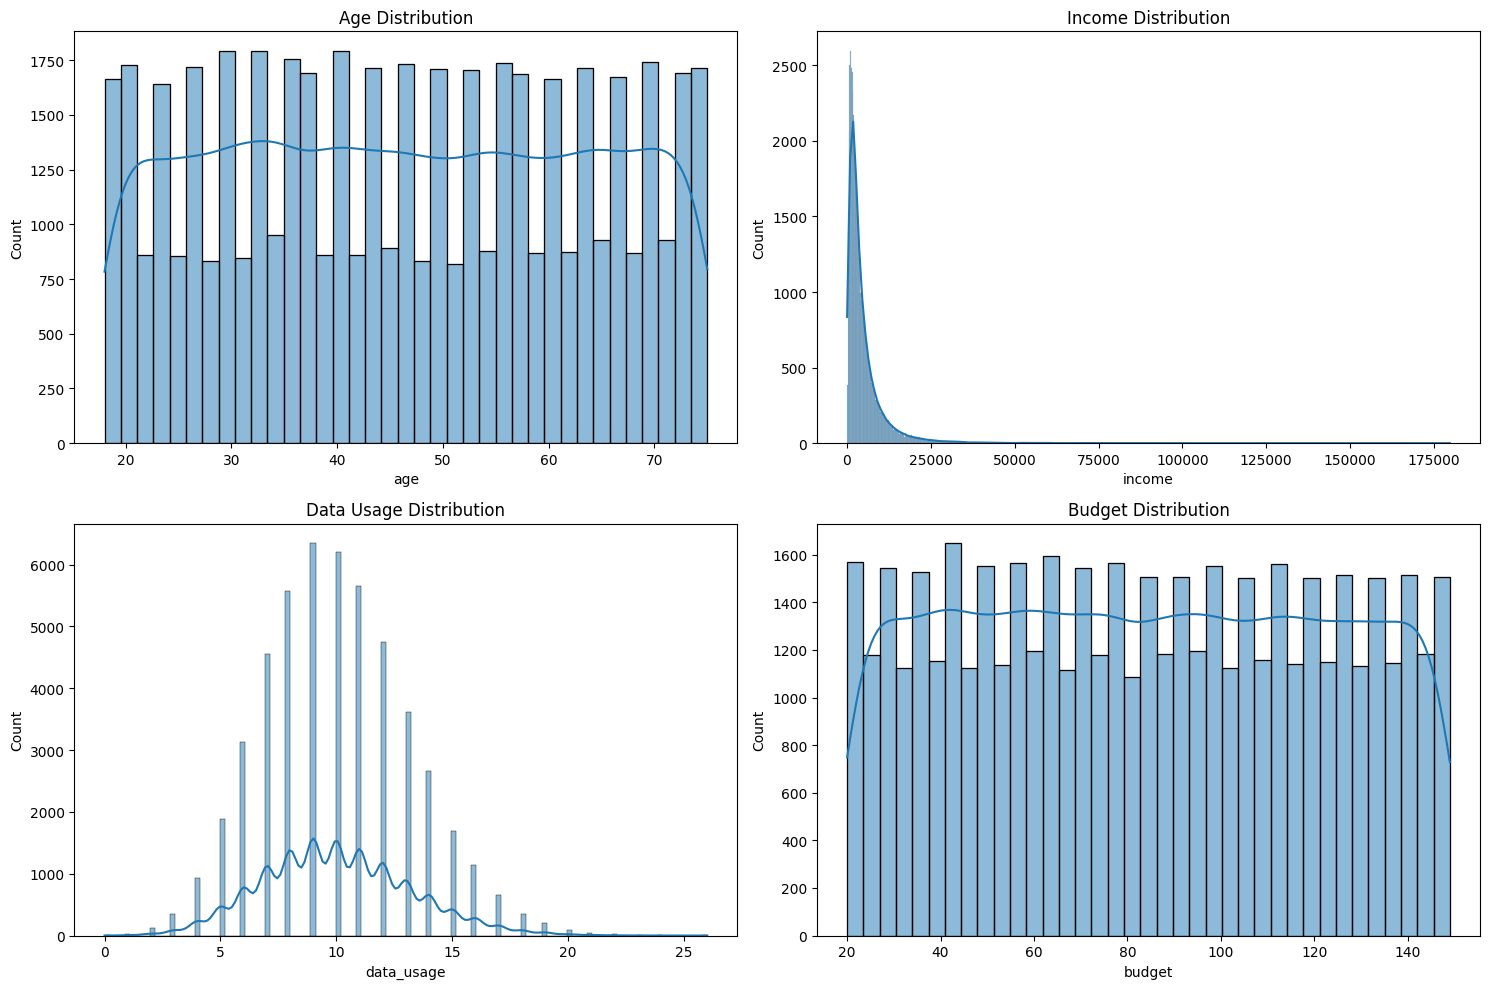

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data['age'], ax=axes[0, 0], kde=True).set_title('Age Distribution')
sns.histplot(data['income'], ax=axes[0, 1], kde=True).set_title('Income Distribution')
sns.histplot(data['data_usage'], ax=axes[1, 0], kde=True).set_title('Data Usage Distribution')
sns.histplot(data['budget'], ax=axes[1, 1], kde=True).set_title('Budget Distribution')
plt.tight_layout()
plt.show()

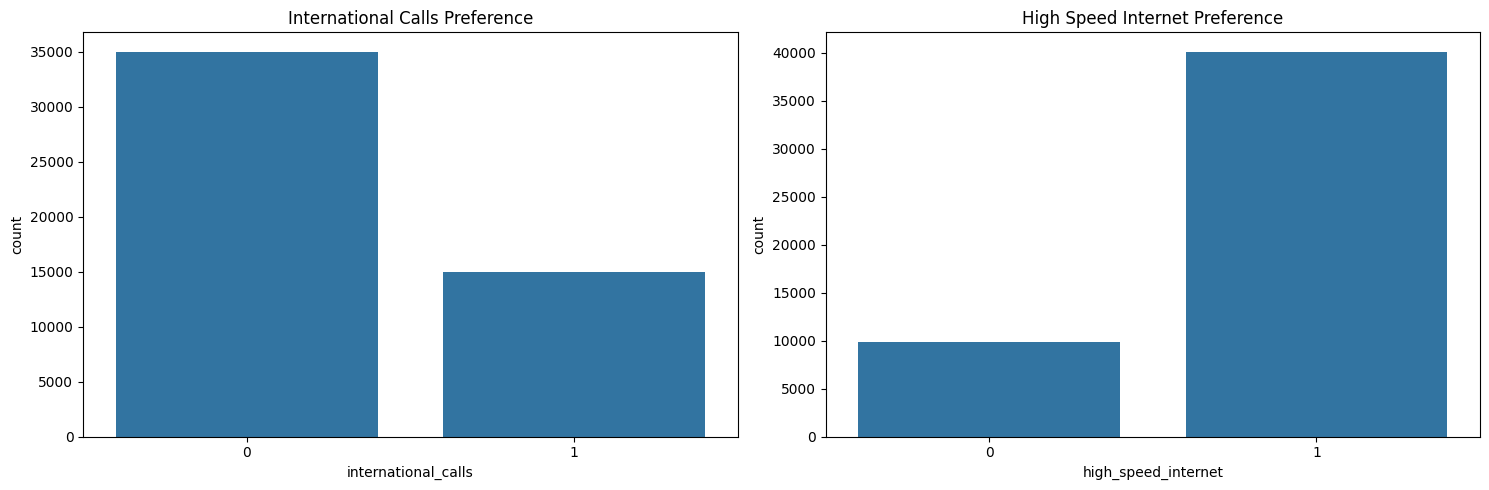

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='international_calls', data=data, ax=ax[0]).set_title('International Calls Preference')
sns.countplot(x='high_speed_internet', data=data, ax=ax[1]).set_title('High Speed Internet Preference')
plt.tight_layout()
plt.show()

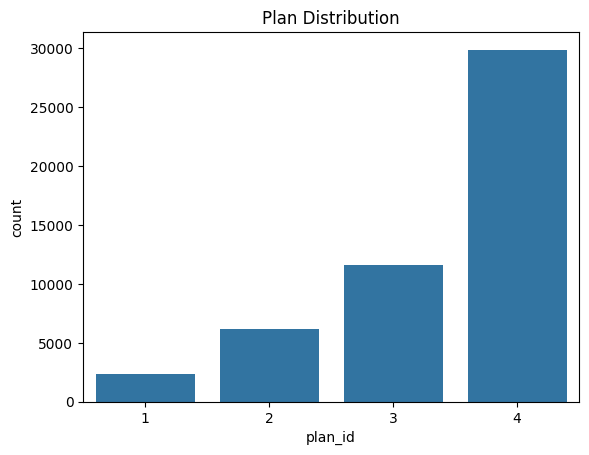

In [10]:
sns.countplot(x='plan_id', data=data).set_title('Plan Distribution')
plt.show()

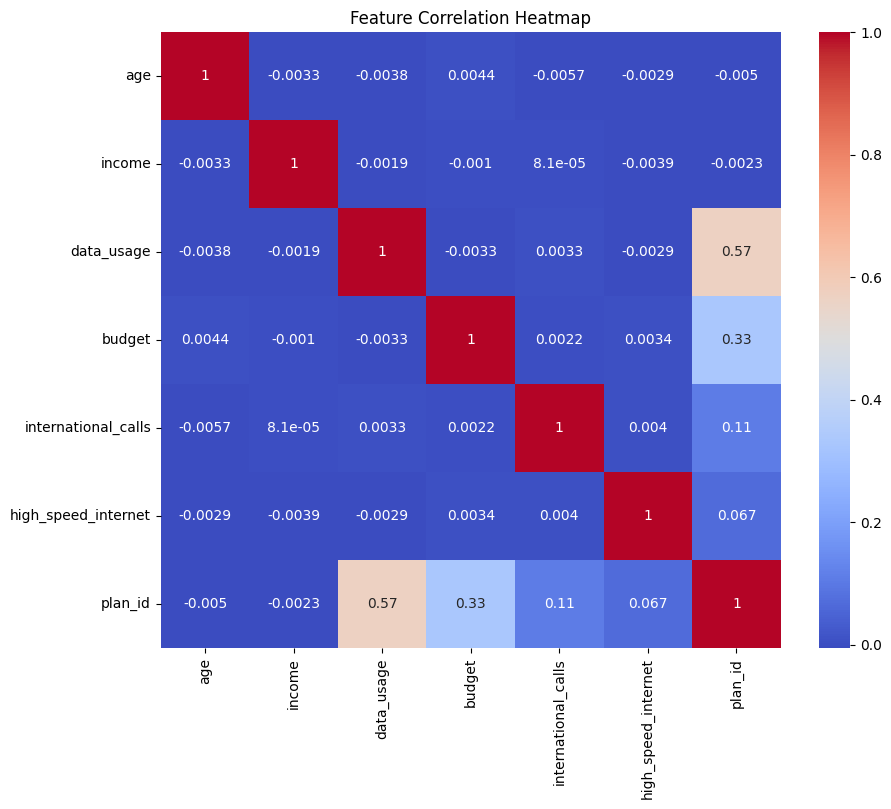

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
data = pd.read_csv('/Users/vasista/Downloads/synthetic_customer_data.csv')

Feature Engineering and Encoding Categorical Features

In [13]:
# Cost per GB
data['cost_per_gb'] = data['budget'] / (data['data_usage'].replace(0, 1))

In [14]:
#Usage-to-budget ratio
data['usage_to_budget_ratio'] = data['data_usage'] / data['budget']

In [15]:
# Categorize Age
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Middle-aged', 'Senior'])

In [16]:
# Normalize continuous features
scaler = MinMaxScaler()
data[['income', 'data_usage', 'budget']] = scaler.fit_transform(data[['income', 'data_usage', 'budget']])

In [17]:
# Encode categorical features
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

In [18]:
print(data.head())

   age    income  data_usage    budget  international_calls  \
0   56  0.007923    0.307692  0.364341                    0   
1   69  0.018416    0.384615  0.496124                    0   
2   46  0.008279    0.653846  0.720930                    0   
3   32  0.003822    0.461538  0.186047                    0   
4   60  0.024847    0.269231  0.472868                    0   

   high_speed_internet  plan_id  cost_per_gb  usage_to_budget_ratio  \
0                    0        4     8.375000               0.119403   
1                    1        4     8.400000               0.119048   
2                    1        4     6.647059               0.150442   
3                    0        3     3.666667               0.272727   
4                    1        2    11.571429               0.086420   

   age_group_Adult  age_group_Middle-aged  age_group_Senior  
0            False                   True             False  
1            False                  False              True  
2       

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['income', 'data_usage', 'budget']])

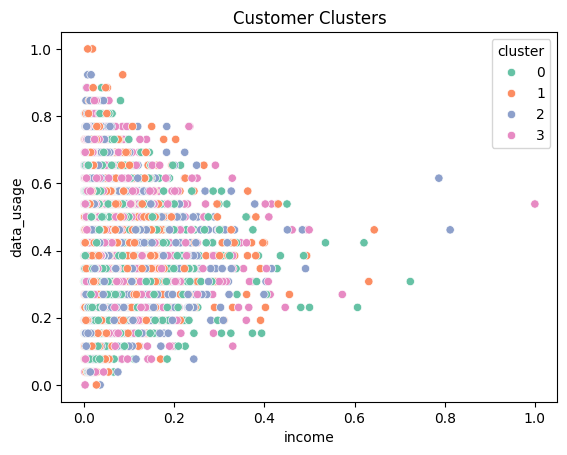

In [20]:
# Visualize clusters
sns.scatterplot(data=data, x='income', y='data_usage', hue='cluster', palette='Set2')
plt.title('Customer Clusters')
plt.show()

Model Training

In [21]:
# Adjust the labels to start from 0
y = data['plan_id'] - 1

# Define the features
X = data.drop(['plan_id'], axis=1)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train length: {len(y_train)}")

X_train shape: (35000, 12)
y_train length: 35000


In [24]:
# Ensure model is trained properly
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predict on a small test case
sample_test = X_train.iloc[:5]
predictions = xgb_model.predict(sample_test)
print(f"Predictions: {predictions}")

Predictions: [3 3 2 3 3]


In [25]:
set_config(display="text")

In [26]:
# Train XGBoost classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False, verbosity=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [28]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       1.00      1.00      1.00      1895
           2       1.00      1.00      1.00      3464
           3       1.00      1.00      1.00      8950

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



Feature Importances

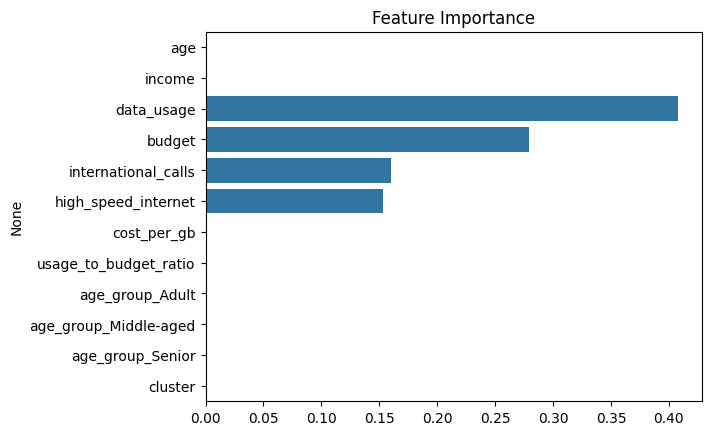

In [29]:
importances = xgb_model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

Retraining Model

In [30]:
# Drop the 'cluster' feature if it's not needed
X = data.drop(['plan_id', 'cluster'], axis=1)

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Retrain the model
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [32]:
# Define selected features (used during training)
selected_features = ['income', 'data_usage', 'budget', 'international_calls', 'high_speed_internet']
print(len(selected_features))
print(len(xgb_model.feature_importances_))
selected_features = X_train.columns.tolist()  # Features used for training
print(selected_features)
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance)

5
11
['age', 'income', 'data_usage', 'budget', 'international_calls', 'high_speed_internet', 'cost_per_gb', 'usage_to_budget_ratio', 'age_group_Adult', 'age_group_Middle-aged', 'age_group_Senior']
                  feature  importance
2              data_usage    0.414183
3                  budget    0.264810
4     international_calls    0.163704
5     high_speed_internet    0.157092
7   usage_to_budget_ratio    0.000152
6             cost_per_gb    0.000059
0                     age    0.000000
1                  income    0.000000
8         age_group_Adult    0.000000
9   age_group_Middle-aged    0.000000
10       age_group_Senior    0.000000


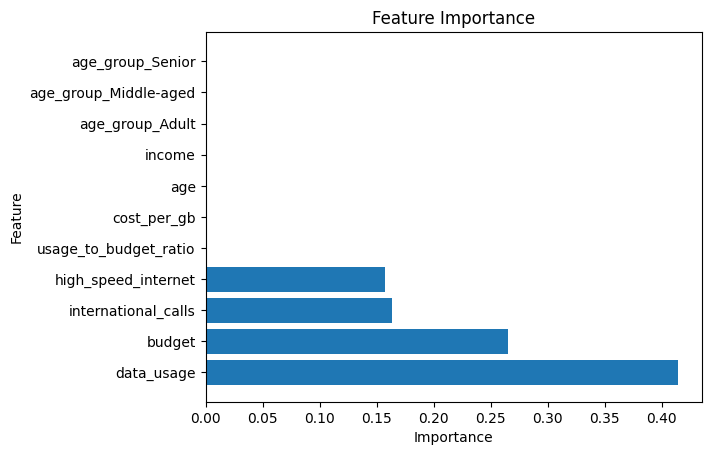

In [33]:
import matplotlib.pyplot as plt
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Defining plan recommendation engine and feedback loop

In [34]:
# Buffer for storing feedback
feedback_buffer = []
feedback_threshold = 100

In [35]:
# Define mappings for human-readable values
income_mapping = {"low": 0.3, "medium": 0.6, "high": 0.9}
data_usage_mapping = {"low": 0.3, "medium": 0.6, "high": 0.9}
budget_mapping = {"low": 0.3, "medium": 0.6, "high": 0.9}
yes_no_mapping = {"no": 0, "yes": 1}
age_group_mapping = {"adult": [1, 0, 0], "middle-aged": [0, 1, 0], "senior": [0, 0, 1]}

In [36]:
def recommend_plan(customer_features):
    probs = xgb_model.predict_proba(customer_features)
    top_plans = np.argsort(probs[0])[::-1][:1]
    return top_plans

In [37]:
# Collect human-readable inputs
income = input("What is your income level? (low, medium, high): ").strip().lower()
data_usage = input("What is your data usage level? (low, medium, high): ").strip().lower()
budget = input("What is your budget level? (low, medium, high): ").strip().lower()
international_calls = input("Do you make international calls? (yes, no): ").strip().lower()
high_speed_internet = input("Do you need high-speed internet? (yes, no): ").strip().lower()
age_group = input("What is your age group? (adult, middle-aged, senior): ").strip().lower()

# Map inputs to numerical values
income_numeric = income_mapping[income]
data_usage_numeric = data_usage_mapping[data_usage]
budget_numeric = budget_mapping[budget]
international_calls_numeric = yes_no_mapping[international_calls]
high_speed_internet_numeric = yes_no_mapping[high_speed_internet]
age_group_numeric = age_group_mapping[age_group]

In [38]:
# Create the customer feature DataFrame
new_customer = pd.DataFrame({
    'income': [income_numeric],
    'data_usage': [data_usage_numeric],
    'budget': [budget_numeric],
    'international_calls': [international_calls_numeric],
    'high_speed_internet': [high_speed_internet_numeric],
    'age': [30],  # Placeholder value
    'cost_per_gb': [0.05],  # Placeholder value
    'usage_to_budget_ratio': [data_usage_numeric / budget_numeric],
    'age_group_Adult': [age_group_numeric[0]],
    'age_group_Middle-aged': [age_group_numeric[1]],
    'age_group_Senior': [age_group_numeric[2]]
}, columns=X_train.columns)

In [45]:
# Recommend a plan
recommended_plans = recommend_plan(new_customer)
recommended_plan_id = recommended_plans[0] + 1  # Add 1 to match the actual plan_id

# Fetch and display plan details
recommended_plan_details = next((plan for plan in plans if plan['plan_id'] == recommended_plan_id), None)

if recommended_plan_details:
    print(f"Recommended Plan: {recommended_plan_details['name']}")
    print(f"Data: {recommended_plan_details['data']} GB")
    print(f"Speed: {recommended_plan_details['speed']}")
    print(f"Price: ${recommended_plan_details['price']}/month")
    print(f"International Calls: {'Yes' if recommended_plan_details['international'] else 'No'}")
    print(f"High-Speed Internet: {'Yes' if recommended_plan_details['high_speed'] else 'No'}")
else:
    print(f"Recommended plan: {recommended_plan_id} (Details not available)")

Recommended Plan: Basic
Data: 2 GB
Speed: 3G
Price: $10/month
International Calls: No
High-Speed Internet: No


In [48]:
# Collect feedback
feedback = input(f"Do you accept the recommended plan {recommended_plan_id}? (1 = yes | 0 = no): ").strip().lower()
accepted = 1 if feedback == 'yes' else 0

Updating feedback loop

In [40]:
# Check if buffer has reached the threshold
if len(feedback_buffer) >= feedback_threshold:
    print("Threshold reached! Retraining model...")
    feedback_data = pd.concat(feedback_buffer, ignore_index=True)
    updated_training_data = pd.concat([X_train.assign(recommended_plan=y_train), feedback_data], ignore_index=True)
    
    # Separate features and target
    X_feedback = updated_training_data.drop(['recommended_plan', 'feedback'], axis=1)
    y_feedback = updated_training_data['recommended_plan']
    
    # Retrain the model
    xgb_model.fit(X_feedback, y_feedback)
    print("Model retrained with feedback data.")
    
    # Clear the feedback buffer
    feedback_buffer = []
    print("Feedback buffer cleared. Ready to collect more feedback!")